In [14]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_allclose
pd.options.mode.copy_on_write = True # trigger immutable behavior

dataset = pd.read_csv('../datasets/Mall_Customers.csv')
X = dataset.iloc[:, 3:5].values

0

0

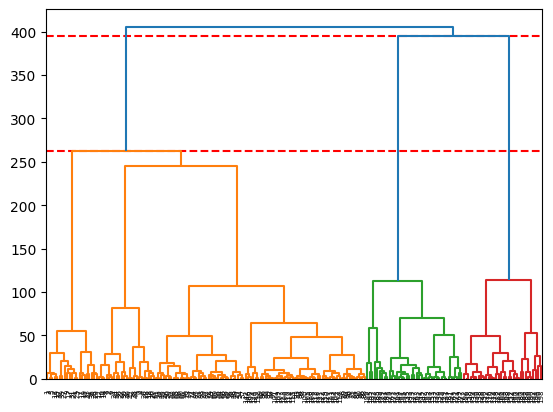

0

In [35]:
import scipy.cluster.hierarchy as sh

def max_distance_boundaries(linkage_matrix: np.ndarray) -> [int, int]:
    maxDiff = -1
    for i in range(len(linkage_matrix) - 1):
        nextItemData = linkage_matrix[i + 1]
        data = linkage_matrix[i]
        diff = nextItemData[2] - data[2]
        if diff > maxDiff:
            maxDiff = diff
            maxDiffData = [diff, i, data[2], nextItemData[2], data, nextItemData]
    return [maxDiffData[2], maxDiffData[3]] if maxDiffData is not None else []


linkage_matrix = sh.linkage(X, method="ward")
max_distance = max_distance_boundaries(linkage_matrix)

for boundary in max_distance:
    plot.axhline(y=boundary, color='r', linestyle='--')

dendrogram = sh.dendrogram(linkage_matrix)

plot.show()

0

In [15]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

0